In [159]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.patches as mpatches



In [160]:
df=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 1901-2010.csv",index_col=0)
df

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12
0,3,1,3,3,4,4,3,4,4,1,2,2
1,2,1,1,5,6,5,2,2,3,2,1,2
2,1,2,1,3,5,6,1,3,2,4,1,2
3,1,1,1,2,2,2,2,4,2,1,1,1
4,1,2,1,7,6,5,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
105,6,7,6,4,4,4,6,4,4,6,7,6
106,6,4,7,4,4,6,6,5,4,6,7,7
107,7,6,4,4,2,2,7,6,4,2,4,4
108,7,7,7,4,4,4,6,6,4,6,7,7


2  :  0.3679556698149649
3  :  0.2542953270702934
4  :  0.24840300590937184
5  :  0.208272430751599
6  :  0.1806832779545005
7  :  0.17236940544244933
8  :  0.12727232936506347
9  :  0.14514928097756288
10  :  0.1275526763886554
11  :  0.1337907795799438
12  :  0.10855077307750906
13  :  0.12056891844942494
14  :  0.12279039385057301


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

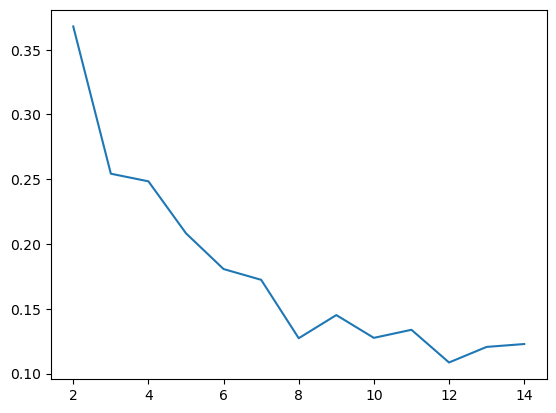

In [161]:
#Validating the number of clusters using silhouette index

k_range = range(2, 15)
silhouette_values=[]

for k in k_range:
    # Create k-means object and fit to data
    kmeans = KMeans(n_clusters=k,random_state=42,n_init='auto')
    kmeans.fit(df)
    
    # Get cluster labels
    labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_values.append(silhouette_score(df, labels))
    
for i in range(len(silhouette_values)):
    print((i+2)," : ",silhouette_values[i])
plt.plot(k_range,silhouette_values)

In [162]:
km = KMeans(n_clusters=4,random_state=42,n_init='auto')
km.fit(df) 

values=km.labels_
vals=[i for i in values]

cnt=[0 for i in range(4)]
for i in range(len(vals)):
    cnt[vals[i]]+=1
print("Number of years in each cluster\n",cnt)

Number of years in each cluster
 [17, 23, 40, 30]


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [163]:
vals

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 3,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 3,
 3,
 1,
 0,
 3,
 1,
 2,
 2,
 1,
 0,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3]

In [164]:
# df = pd.DataFrame(vals, columns=(['Cluster Number']))
# df.to_csv('SSTA Cluster Number 1901-2010.csv')

In [165]:
# labels = kmeans.labels_
# labels
km.inertia_

1592.7938405797101

In [166]:
years_Cluster={
    0:[],
    1:[],
    2:[],
    3:[]
}

years_Cluster_not_indexs={
    0:[],
    1:[],
    2:[],
    3:[]
}

yr=1901
indx=0
for i in range(len(values)):
    years_Cluster[values[i]].append(indx)
    years_Cluster_not_indexs[values[i]].append(yr)
    indx+=1
    yr+=1

years_Cluster_not_indexs

{0: [1912,
  1914,
  1915,
  1919,
  1926,
  1931,
  1940,
  1942,
  1946,
  1952,
  1953,
  1957,
  1958,
  1960,
  1966,
  1972,
  1978],
 1: [1920,
  1924,
  1936,
  1937,
  1944,
  1945,
  1947,
  1954,
  1959,
  1961,
  1962,
  1963,
  1964,
  1967,
  1971,
  1974,
  1977,
  1984,
  1985,
  1986,
  1989,
  1996,
  2008],
 2: [1901,
  1902,
  1903,
  1904,
  1905,
  1906,
  1907,
  1908,
  1909,
  1910,
  1911,
  1913,
  1916,
  1917,
  1918,
  1921,
  1922,
  1923,
  1925,
  1927,
  1928,
  1929,
  1930,
  1932,
  1933,
  1934,
  1935,
  1938,
  1939,
  1943,
  1948,
  1949,
  1950,
  1951,
  1955,
  1956,
  1965,
  1968,
  1975,
  1976],
 3: [1941,
  1969,
  1970,
  1973,
  1979,
  1980,
  1981,
  1982,
  1983,
  1987,
  1988,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2009,
  2010]}

In [167]:
def PlotMap(data,cluster=None):
    
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(16,8))
    
    # Create a colormap
    cmap = plt.get_cmap('seismic')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = -1.0  # Minimum value for the color scale
    vmax = 1.0 # Maximum value for the color scale
    
    regions = {
        'Atlantic Nino': [[340//2, 360//2], [-5//2+45, 5//2+45]],
        'Bay of Bengal': [[80//2, 100//2], [6//2+45, 20//2+45]],
        'Zonal Mode': [[50//2, 70//2], [-10//2+45, 10//2+45]],
        'Nino3': [[210//2, 270//2], [-5//2+45, 5//2+45]],
        'Nino3.4': [[190//2, 240//2], [-5//2+45, 5//2+45]],
        'Nino 4': [[160//2, 210//2], [-5//2+45, 5//2+45]],
        'North Atlantic': [[300//2, 350//2], [30//2+45, 45//2+45]],
        'North Pacific 1': [[140//2, 180//2], [30//2+45, 65//2+45]],
        'North Pacific 2': [[200//2, 240//2], [30//2+45, 65//2+45]],
        'South China Sea': [[110//2, 120//2], [5//2+45, 15//2+45]],
        'Southern Indian Ocean': [[40//2, 100//2], [-5//2+45, 15//2+45]],
        'Western Indian Ocean': [[50//2, 65//2], [-5//2+45, 10//2+45]],
    
      }
    
    colors = ['red', 'blue', 'green', 'yellow', 'magenta', 'cyan', 
          'orange', 'purple', 'brown', 'pink', 'gray', 'olive']
    
    i=0
    for name, coords in regions.items():
        x1, x2 = coords[0]
        y1, y2 = coords[1]
        rect = mpatches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor=colors[i],facecolor='None')
        ax.add_patch(rect)
        i+=1
        
           
    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Temperature')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'World Map {cluster}')
    
    #plt.savefig(f'Cluster {cluster}.png', dpi=100, bbox_inches='tight')


In [269]:
def PlotAllMap(data,cluster=None):
    
    # Create a figure and axis for the plot
    fig, axes = plt.subplots(1,4,figsize=(50,5))
    
    # Create a colormap
    cmap = plt.get_cmap('seismic')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = -1.0  # Minimum value for the color scale
    vmax = 1.0 # Maximum value for the color scale
    
    regions = {
        'Atlantic Nino': [[340//2, 360//2], [-5//2+45, 5//2+45]],
        'Bay of Bengal': [[80//2, 100//2], [6//2+45, 20//2+45]],
        'Zonal Mode': [[50//2, 70//2], [-10//2+45, 10//2+45]],
        'Nino3': [[210//2, 270//2], [-5//2+45, 5//2+45]],
        'Nino3.4': [[190//2, 240//2], [-5//2+45, 5//2+45]],
        'Nino 4': [[160//2, 210//2], [-5//2+45, 5//2+45]],
        'North Atlantic': [[300//2, 350//2], [30//2+45, 45//2+45]],
        'North Pacific 1': [[140//2, 180//2], [30//2+45, 65//2+45]],
        'North Pacific 2': [[200//2, 240//2], [30//2+45, 65//2+45]],
        'South China Sea': [[110//2, 120//2], [5//2+45, 15//2+45]],
        'Southern Indian Ocean': [[40//2, 100//2], [-5//2+45, 15//2+45]],
        'Western Indian Ocean': [[50//2, 65//2], [-5//2+45, 10//2+45]],
    
      }
    
    colors = ['red', 'blue', 'green', 'yellow', 'magenta', 'cyan', 
          'orange', 'purple', 'brown', 'pink', 'gray', 'olive']
    
   
    
    cluster=1
    
    for i, ax in enumerate(axes.ravel()):
        j=0
        for name, coords in regions.items():
            x1, x2 = coords[0]
            y1, y2 = coords[1]
            rect = mpatches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor=colors[j],facecolor='None')
            ax.add_patch(rect)
            j+=1
        
        # Plot the average yearly rainfall data using the colormap
        im = ax.imshow(data[i].to_array()[0], cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')

        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, label='Temperature')

        # Set axis labels
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_title(f'World Map {cluster}')
        cluster+=1

    plt.savefig(f'SSTA Clusters.png')


In [249]:
#Accessing the zone files
region1=[]
region2=[]
region3=[]
region4=[]
region5=[]
region6=[]
region7=[]
region8=[]
region9=[]
region10=[]
region11=[]
region12=[]


#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]
path8=[]
path9=[]
path10=[]
path11=[]
path12=[]


#Storing the paths in a array
for i in range(1901,2011):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 1\ssta_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 2\ssta_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 3\ssta_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 4\ssta_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 5\ssta_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 6\ssta_{i}.nc")
    path7.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 7\ssta_{i}.nc")
    path8.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 8\ssta_{i}.nc")
    path9.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 9\ssta_{i}.nc")
    path10.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 10\ssta_{i}.nc")
    path11.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 11\ssta_{i}.nc")
    path12.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 12\ssta_{i}.nc")

   
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    region1.append(xarray.open_dataset(path1[i]))
    region2.append(xarray.open_dataset(path2[i]))
    region3.append(xarray.open_dataset(path3[i]))
    region4.append(xarray.open_dataset(path4[i]))
    region5.append(xarray.open_dataset(path5[i]))
    region6.append(xarray.open_dataset(path6[i]))
    region7.append(xarray.open_dataset(path7[i]))
    region8.append(xarray.open_dataset(path8[i]))
    region9.append(xarray.open_dataset(path9[i]))
    region10.append(xarray.open_dataset(path10[i]))
    region11.append(xarray.open_dataset(path11[i]))
    region12.append(xarray.open_dataset(path12[i]))

    

In [250]:
def getFullMapCluster(region1,region2,region3,region4,region5,region6,
                      region7,region8,region9,region10,region11,region12,
                      cluster_years):
    
    cluster_region1=[]
    cluster_region2=[]
    cluster_region3=[]
    cluster_region4=[]
    cluster_region5=[]
    cluster_region6=[]
    cluster_region7=[]
    cluster_region8=[]
    cluster_region9=[]
    cluster_region10=[]
    cluster_region11=[]
    cluster_region12=[]
    
    for i in cluster_years:
        cluster_region1.append(region1[i])
        cluster_region2.append(region2[i])
        cluster_region3.append(region3[i])
        cluster_region4.append(region4[i])
        cluster_region5.append(region5[i])
        cluster_region6.append(region6[i])
        cluster_region7.append(region7[i])
        cluster_region8.append(region8[i])
        cluster_region9.append(region9[i])
        cluster_region10.append(region10[i])
        cluster_region11.append(region11[i])
        cluster_region12.append(region12[i])

    cluster_region1_combined=xarray.concat(cluster_region1,dim='years')
    cluster_region2_combined=xarray.concat(cluster_region2,dim='years')
    cluster_region3_combined=xarray.concat(cluster_region3,dim='years')
    cluster_region4_combined=xarray.concat(cluster_region4,dim='years')
    cluster_region5_combined=xarray.concat(cluster_region5,dim='years')
    cluster_region6_combined=xarray.concat(cluster_region6,dim='years')
    cluster_region7_combined=xarray.concat(cluster_region7,dim='years')
    cluster_region8_combined=xarray.concat(cluster_region8,dim='years')
    cluster_region9_combined=xarray.concat(cluster_region9,dim='years')
    cluster_region10_combined=xarray.concat(cluster_region10,dim='years')
    cluster_region11_combined=xarray.concat(cluster_region11,dim='years')
    cluster_region12_combined=xarray.concat(cluster_region12,dim='years')

    cluster_region1_mean=cluster_region1_combined.mean(dim='years')
    cluster_region2_mean=cluster_region2_combined.mean(dim='years')
    cluster_region3_mean=cluster_region3_combined.mean(dim='years')
    cluster_region4_mean=cluster_region4_combined.mean(dim='years')
    cluster_region5_mean=cluster_region5_combined.mean(dim='years')
    cluster_region6_mean=cluster_region6_combined.mean(dim='years')
    cluster_region7_mean=cluster_region7_combined.mean(dim='years')
    cluster_region8_mean=cluster_region8_combined.mean(dim='years')
    cluster_region9_mean=cluster_region9_combined.mean(dim='years')
    cluster_region10_mean=cluster_region10_combined.mean(dim='years')
    cluster_region11_mean=cluster_region11_combined.mean(dim='years')
    cluster_region12_mean=cluster_region12_combined.mean(dim='years')


    cluster_fullMap=cluster_region1_mean.combine_first(cluster_region2_mean.combine_first(cluster_region3_mean.combine_first(
                    cluster_region4_mean.combine_first(cluster_region5_mean.combine_first(cluster_region6_mean.combine_first(
                    cluster_region7_mean.combine_first(cluster_region8_mean.combine_first(cluster_region9_mean.combine_first(
                    cluster_region10_mean.combine_first(cluster_region11_mean.combine_first(cluster_region12_mean)))))))))))
    
    return cluster_fullMap

In [251]:
#Getting the cluster zonal data and meaning them
cluster1_years=years_Cluster[0]
cluster2_years=years_Cluster[1]
cluster3_years=years_Cluster[2]
cluster4_years=years_Cluster[3]


cluster1_fullMap=getFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,cluster1_years)
cluster2_fullMap=getFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,cluster2_years)
cluster3_fullMap=getFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,cluster3_years)
cluster4_fullMap=getFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,cluster4_years)



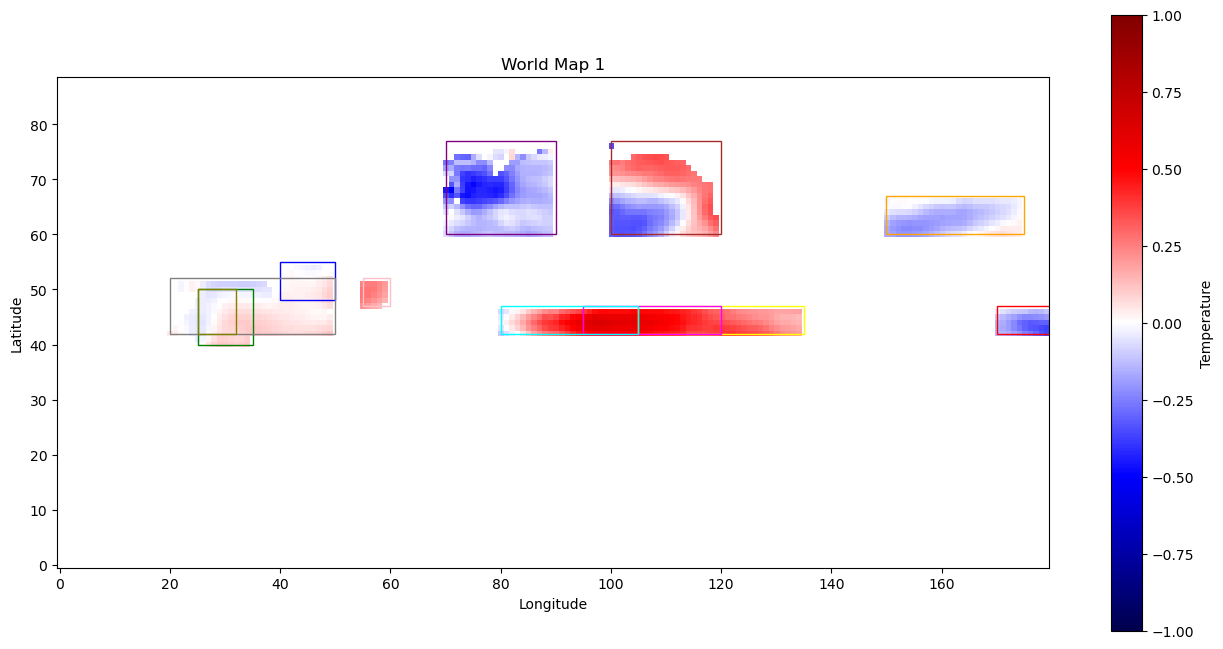

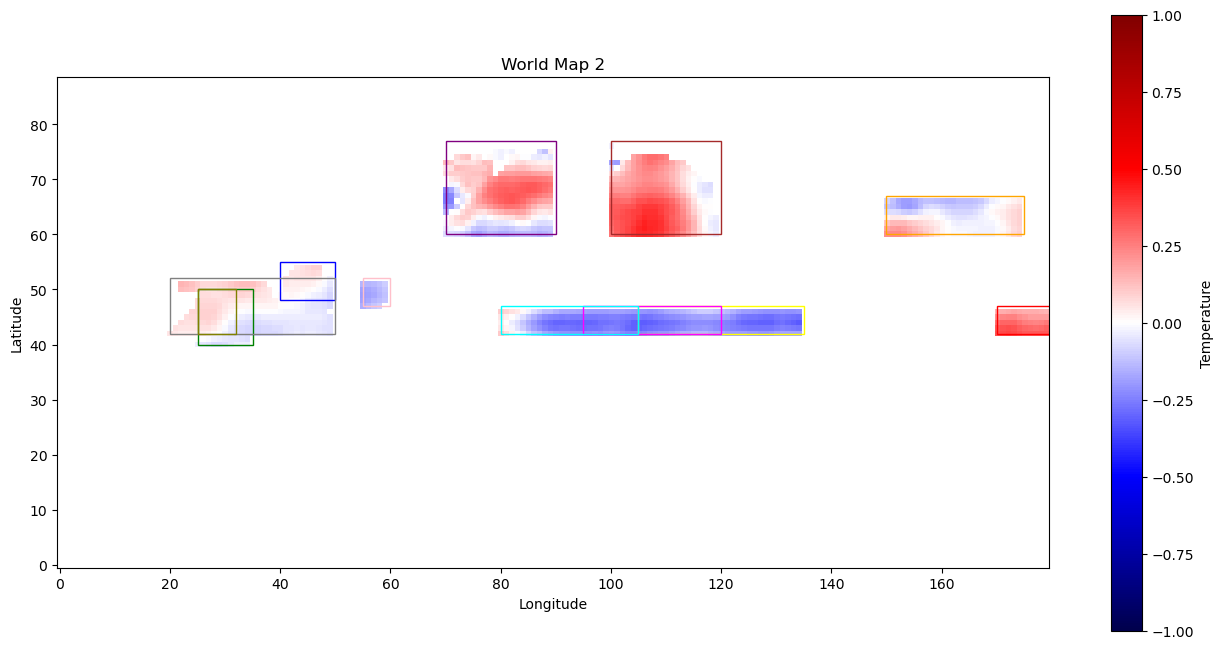

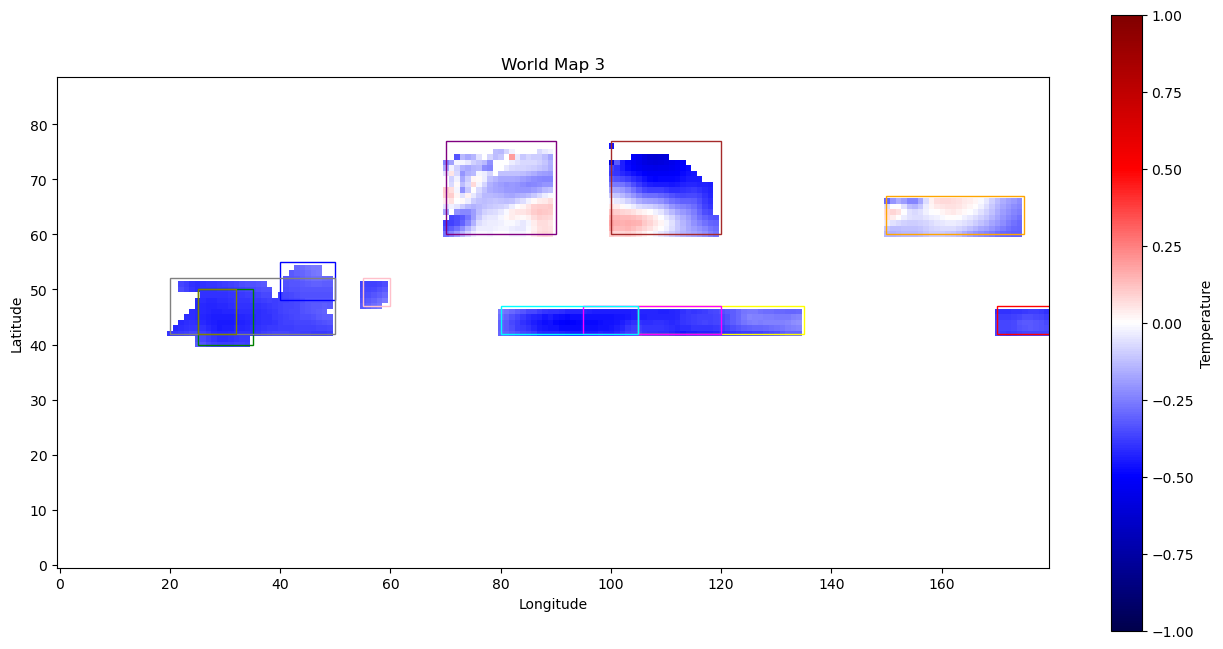

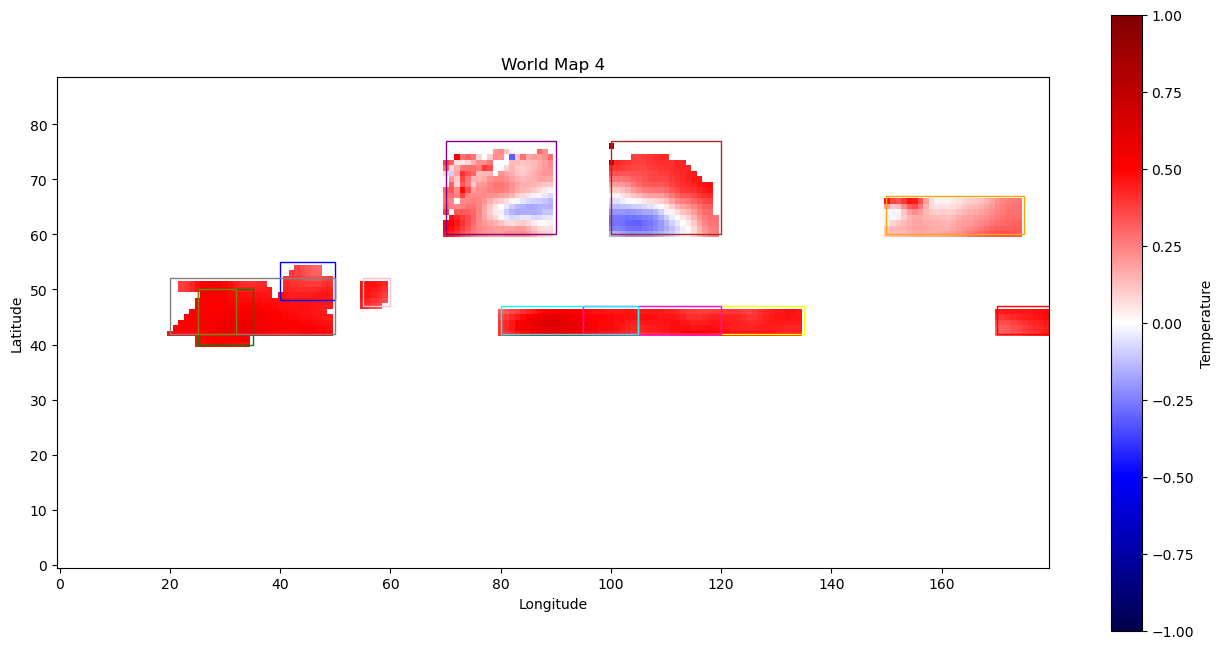

In [258]:
PlotMap(cluster1_fullMap.to_array()[0],cluster=1)
PlotMap(cluster2_fullMap.to_array()[0],cluster=2)
PlotMap(cluster3_fullMap.to_array()[0],cluster=3)
PlotMap(cluster4_fullMap.to_array()[0],cluster=4)


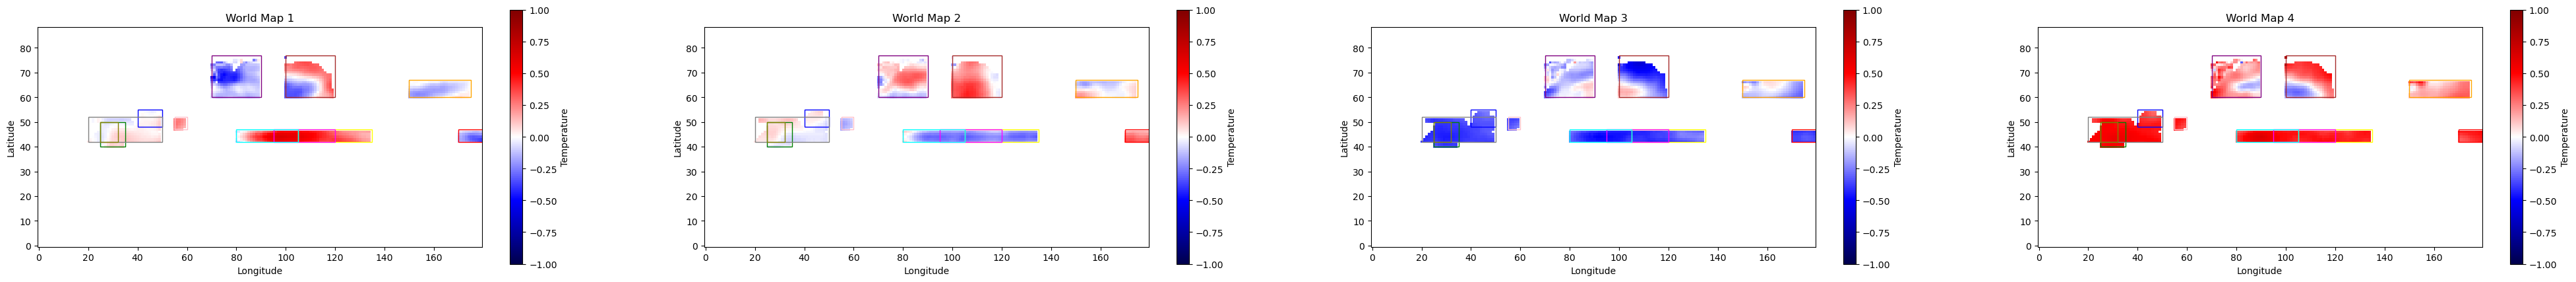

In [270]:
arr=[cluster1_fullMap,cluster2_fullMap,cluster3_fullMap,cluster4_fullMap]
PlotAllMap(arr)


In [174]:
#Accessing the zone files
region1=[]
region2=[]
region3=[]
region4=[]
region5=[]
region6=[]
region7=[]
region8=[]
region9=[]
region10=[]
region11=[]
region12=[]


#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]
path8=[]
path9=[]
path10=[]
path11=[]
path12=[]


#Storing the paths in a array
for i in range(2010,2023):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 1\ssta_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 2\ssta_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 3\ssta_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 4\ssta_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 5\ssta_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 6\ssta_{i}.nc")
    path7.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 7\ssta_{i}.nc")
    path8.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 8\ssta_{i}.nc")
    path9.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 9\ssta_{i}.nc")
    path10.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 10\ssta_{i}.nc")
    path11.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 11\ssta_{i}.nc")
    path12.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 12\ssta_{i}.nc")

   
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    region1.append(xarray.open_dataset(path1[i]))
    region2.append(xarray.open_dataset(path2[i]))
    region3.append(xarray.open_dataset(path3[i]))
    region4.append(xarray.open_dataset(path4[i]))
    region5.append(xarray.open_dataset(path5[i]))
    region6.append(xarray.open_dataset(path6[i]))
    region7.append(xarray.open_dataset(path7[i]))
    region8.append(xarray.open_dataset(path8[i]))
    region9.append(xarray.open_dataset(path9[i]))
    region10.append(xarray.open_dataset(path10[i]))
    region11.append(xarray.open_dataset(path11[i]))
    region12.append(xarray.open_dataset(path12[i]))

    

In [175]:
predict_category=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 2011-2022.csv",index_col=0)
predict_category

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12
0,7,6,6,4,3,3,5,6,4,3,6,6
1,4,7,6,5,4,4,7,5,4,7,6,5
2,6,7,7,4,4,4,6,4,5,7,7,7
3,6,7,7,5,5,6,6,5,6,7,7,7
4,7,7,7,6,6,7,7,6,7,6,7,7
5,6,7,7,6,7,7,7,5,6,7,7,7
6,7,7,7,6,6,6,7,6,5,4,7,7
7,6,7,7,4,4,6,7,7,6,7,7,7
8,7,7,7,6,6,6,7,6,6,6,7,7
9,7,7,7,6,6,6,7,6,6,7,7,7


In [176]:
predicted=km.predict(predict_category)

In [177]:
predicted

array([1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [178]:
# df = pd.DataFrame(predicted, columns=(['Cluster Number']))
# df.to_csv('SSTA Cluster Number 2011-2022.csv')
# df